<a href="https://colab.research.google.com/github/Rohini06GitHub/github/blob/main/Bigmarket_Sales_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
# #run=shift+enter and suggestion=contrl+space

Loading of Data

In [9]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/Big_Mart Dataset/Train.csv')


In [10]:
test =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/Big_Mart Dataset/Test.csv')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/Big_Mart Dataset/Test.csv')

In [13]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/Big_Mart Dataset/Train.csv')

Data Structures and Content



In [14]:
train.shape # it explains how many rows and coloumns in the data

(8523, 12)

In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
train.isnull().sum() # to get the sum of the train #

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [17]:
test.dtypes # the data type of eachcoloumn of dataframe

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [18]:
train.duplicated() #to ge the duplicated on the data by train(80% of data) dataset

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [19]:
train.info() # to get the overall information about the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
train.describe()# the description of train dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
train.head() # the first n of the rows and columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
train['Item_Type'].value_counts() # to see the type counts

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [23]:
test['Item_Fat_Content'].value_counts()# to get count of item fast count in test(20%) dataset

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


#DATA STRUCTURE AND CONTENT



#DATA PREPROCESSING


In [24]:
train['Item_Fat_Content'].value_counts()# we saw that it has same low fat in different form so in next step we replace aal in one

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [25]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)# so here we replaced

In [26]:
test['Item_Fat_Content'].value_counts()#where same as its test dataset

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
train_df=train.copy()
test_df=test.copy()

 #EXPLARATORY DATA ANALYSIS



# EXPLARATORY DATA ANALYSIS


uni Variate analysis

In [30]:
 import matplotlib.pyplot as plt
 import seaborn as sns
 from matplotlib import colors # library files to analyze a graph clearly

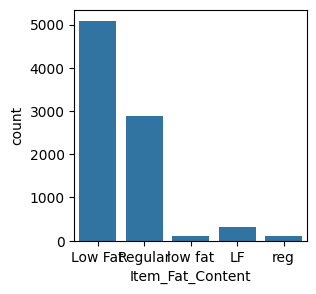

In [31]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()
#to plot the item fat count with respective with count to easier to analyze

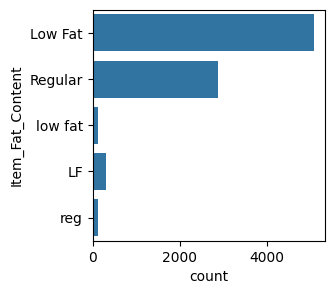

In [32]:
plt.figure(figsize=(3,3))
sns.countplot(y='Item_Fat_Content', data=train)
plt.ylabel('Item_Fat_Content')
plt.show()
# if x label is not clear or overlap we use in y axis

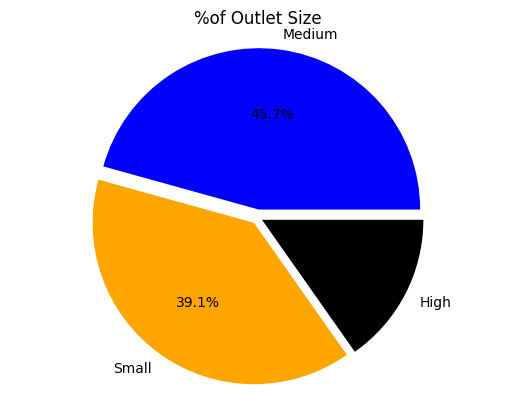

In [33]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.04,0.03)
colors=('blue','orange','black')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%of Outlet Size')
plt.axis('equal')
plt.show()# By using this piechart its easy to determine the size

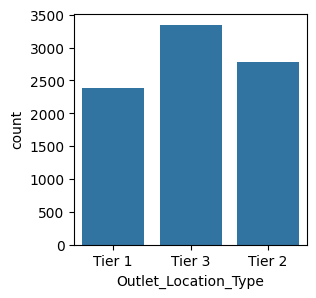

In [34]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show() #it shows that type 2 has comparatively higher than the other 2 location type

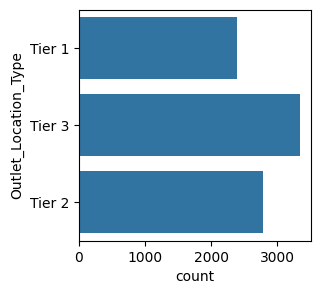

In [35]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Location_Type',data=train)
plt.ylabel('Outlet_Location_Type')
plt.show()# same as in y axis

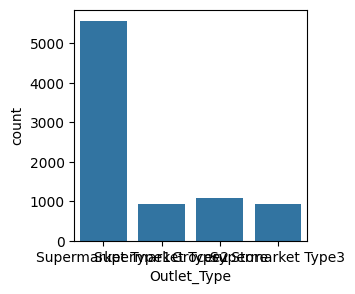

In [36]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Type',data=train)
plt.xlabel('Outlet_Type')
plt.show()# it shows that type 1 has higher count than other types

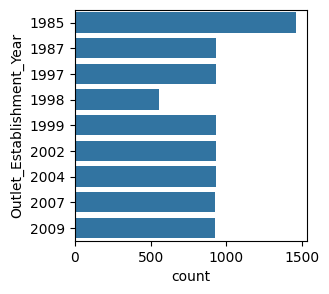

In [37]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year',data=train)
plt.ylabel('Outlet_Establishment_Year')
plt.show()
 #it shows that the year 1985 has an high no.of count sale on the bigmarket

# To Handle the Missing and catagorical values

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()
for col in train.columns:
  if train[col].dtype=='object':
    train[col]=le.fit_transform(train[col])

In [40]:
train['Outlet_Size'].dtypes

dtype('int64')

In [41]:
train.head() # first no. in the rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [42]:
imputer=SimpleImputer(strategy='mean')
missing_columns=['Item_Weight','Outlet_Size']
train[missing_columns]=imputer.fit_transform(train[missing_columns])
#imputer helps to fit the value or data in the missing column by mean of the datas

In [43]:
le=LabelEncoder()
for col in test.columns:
  if test[col].dtype=='object':
    test[col]=le.fit_transform(test[col])

In [44]:
test['Outlet_Size'].dtypes

dtype('int64')

In [45]:
test.head()# test (20% of the data)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In [46]:
imputer=SimpleImputer(strategy='mean')
missing_columns=['Item_Weight','Outlet_Size']
test[missing_columns]=imputer.fit_transform(test[missing_columns])
#imputer helps to fit the value or data in the missing column by mean of the datas


# Handling the Outliers

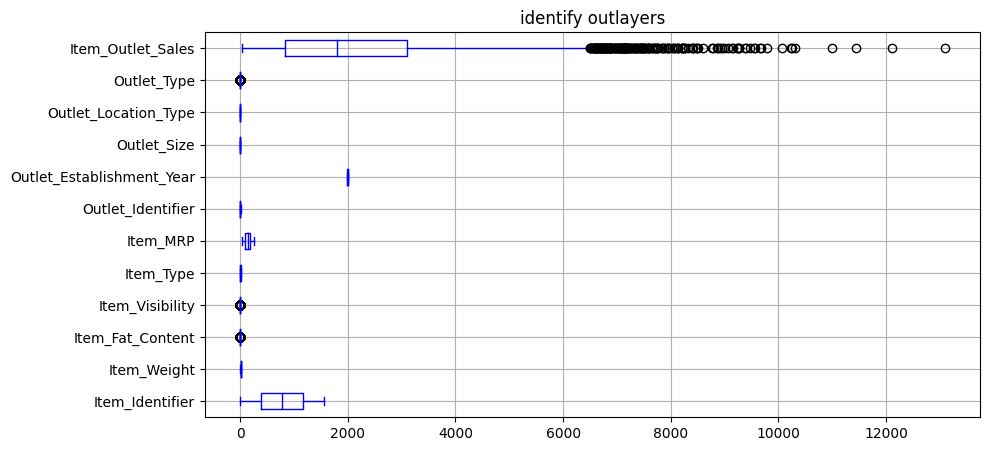

In [47]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show() #the outliers are present in the item_visiblity,item_outlet sales and Outlet_type

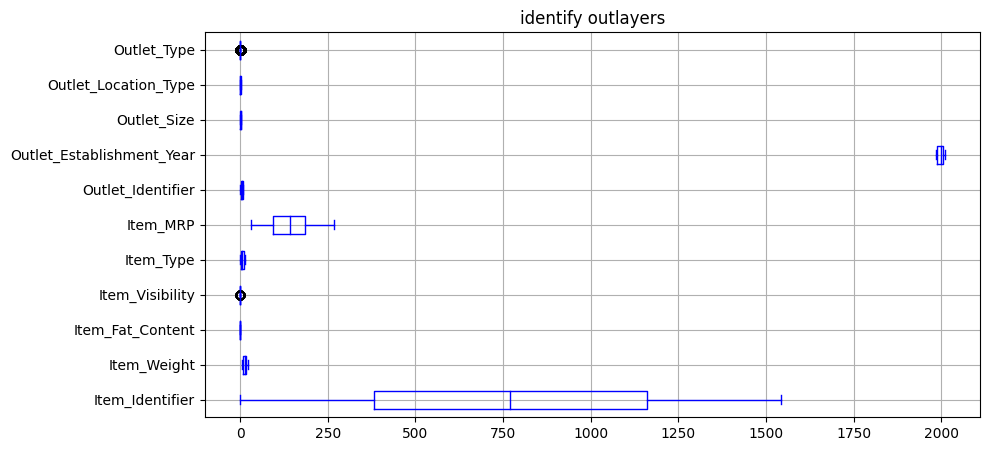

In [48]:
number_columns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()
# it explains that outliers are present in the Outlet type ,Item visibility and item_Fat_Content and it ercits the range in item_mrp and item_identifier

CUBE ROOT TRANSFORMATION

In [49]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)
# 25% of the oulet sales is taken in q1, as same as 75% of outlet sales taken in q3 after that to
#find the iqr(INTER QUARTILE RANge)


q1 834.2474
q3 3101.2964
IQR 2267.049


In [50]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)
# to get the upper lit value above the q3 and lower limit value below the q1 to find the particular cube value of the  respective coloumn

upperlimit 6501.8699
lowerlimit -2566.3261


In [51]:
train['Outlet_sales_cube']=np.cbrt(train['Item_Outlet_Sales'])# to get the cube value of the particular outlier

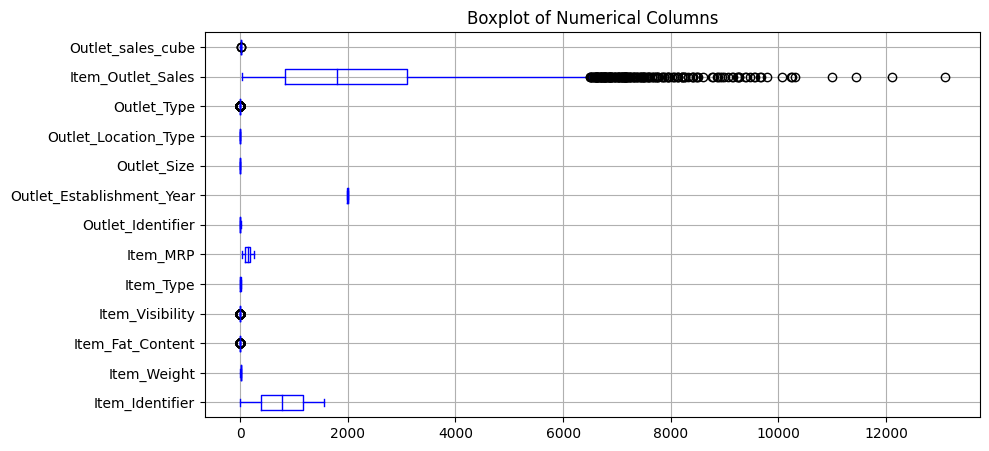

In [52]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('Boxplot of Numerical Columns')
plt.show() #the outliers are present in the item_visiblity,item_outlet sales and Outlet_type

SQUAREROOT TRANSFORMATION


In [53]:
train['Outlet_sales_sqrt']=np.sqrt(train['Item_Outlet_Sales'])
#to get the square root value of the particular outlier

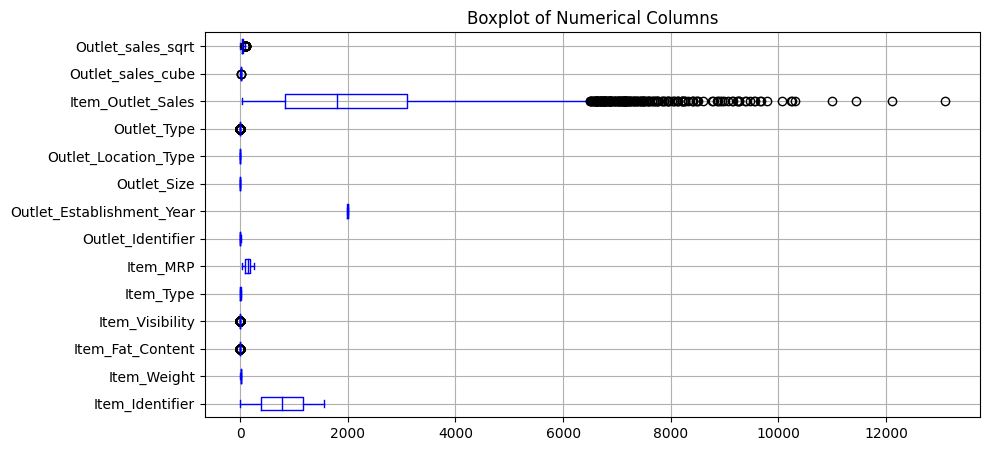

In [54]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('Boxplot of Numerical Columns')
plt.show()# the outliers are present in the Outlet_sales_cube and item visiblity

<ipython-input-55-cb815dbf5db5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Outlet_sales_sqrt'],kde=True,rug=True)


<Axes: xlabel='Outlet_sales_sqrt', ylabel='Density'>

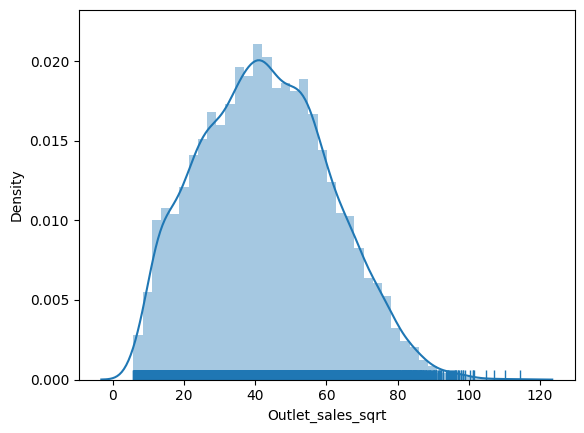

In [55]:
sns.distplot(train['Outlet_sales_sqrt'],kde=True,rug=True)
#kde-kenel density estimate-how data estimate
#dark blue color represent ouliers and its a skew positive graph
#transform square root to bell shaped

BI VARIATE ANALYSIS

<ipython-input-56-03cd65df050d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True,rug=True)


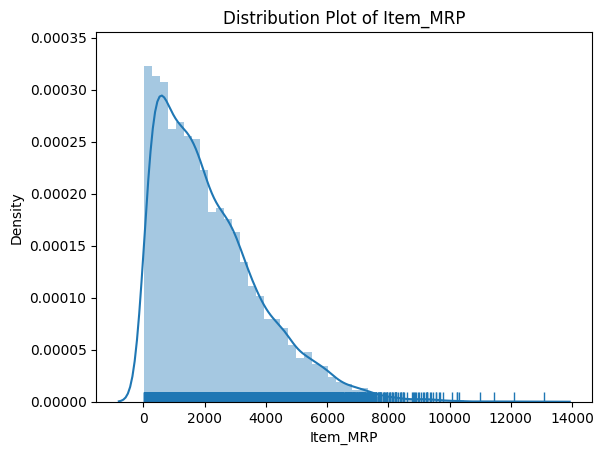

In [56]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True,rug=True)
plt.title('Distribution Plot of Item_MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Density')
plt.show()#dark blue color represent ouliers and its a skew positive graph
#kde-kenel density estimate-how data estimate

<ipython-input-57-44af09b800fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Outlet_sales_cube'],kde=True,rug=True)


<Axes: xlabel='Outlet_sales_cube', ylabel='Density'>

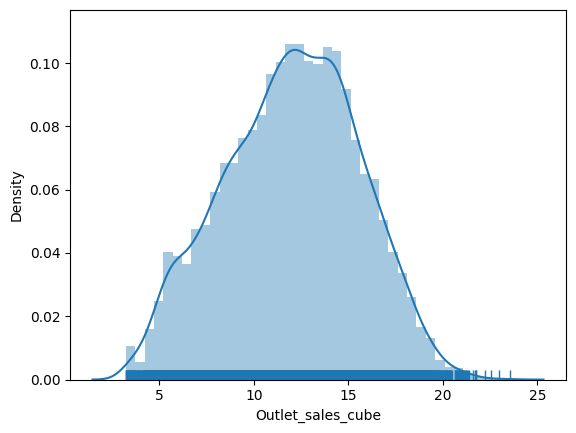

In [57]:
sns.distplot(train['Outlet_sales_cube'],kde=True,rug=True)
#kde-kenel density estimate-how data estimate
#dark blue color represent ouliers and its a skew positive graph
#transform cube root to bell shaped

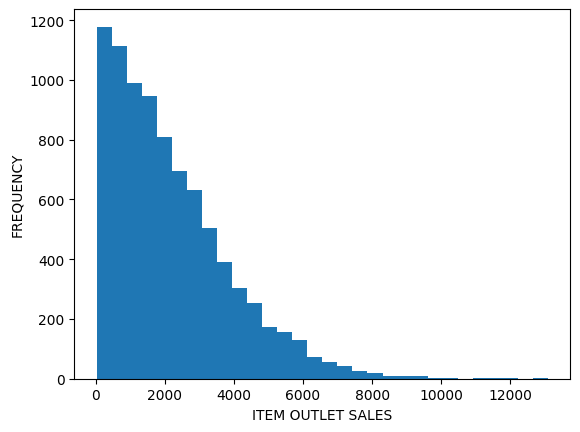

In [58]:
#graphing the histogram from the matplotlib library for the Item Outlet Sales Column.
plt.hist(train['Item_Outlet_Sales'],bins=30)
#labeing the x and y axses in the graph.
plt.xlabel("ITEM OUTLET SALES")
plt.ylabel("FREQUENCY")
#visualising the graph
plt.show()

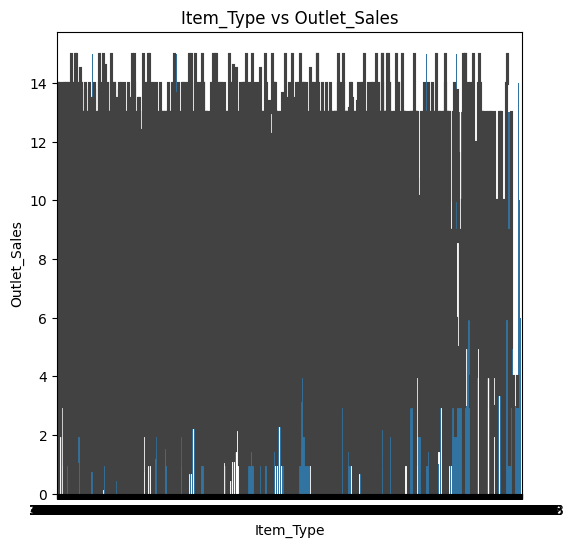

In [59]:
#creating a bar plot of item type vs outlet sales
plt.figure(figsize=(6,6))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train).set(title="Item_Type vs Outlet_Sales")
#setting the axis label
plt.xlabel('Item_Type')
plt.ylabel('Outlet_Sales')
# to rotate the x axis to avoid overlapping
plt.show()

MULTIVIBRATE ANALYSIS

correlation

    the points ex: o.55  is a positive correlative
                   0.01 is a neutral correlative which is closer to 1
                   -0.21 is negative correlation

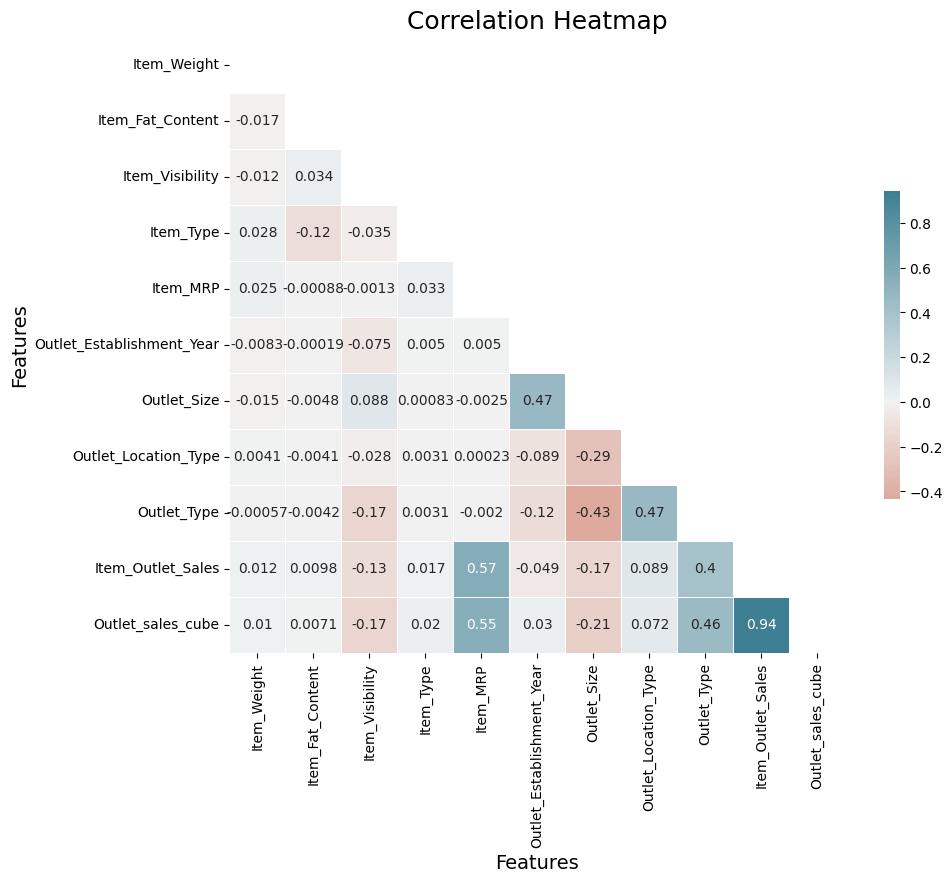

In [60]:
# Subset the dataset to include only the relevant columns
subset = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
             'Item_Outlet_Sales','Outlet_sales_cube']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

#FEATURE ENGINEERING



In [61]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_sales_cube,Outlet_sales_sqrt
0,156,9.30,1,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,61.115775
1,8,5.92,2,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,21.057607
2,662,17.50,1,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,45.795961
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,27.062520
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,31.538947


In [62]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024- year)
 #lambda fun will be executed each and every record
#lambda data type in outlet establishment year

In [63]:
train.head()# to get a outlet age coloumn

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_sales_cube,Outlet_sales_sqrt,Outlet_Age
0,156,9.30,1,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,61.115775,25
1,8,5.92,2,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,21.057607,15
2,662,17.50,1,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,45.795961,25
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,27.062520,26
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,31.538947,37


In [64]:
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)
# to remove a column we use drop
# item and outlet identifier have an unique and unwanted list so we remove that
# we also drop establishment year because we get an outlet age by the establishment year so drop year column



In [65]:
 train=train.drop(['Item_Visibility','Outlet_sales_sqrt'],axis=1) #normalistion feature scaling for the decision tree
 #standard scaling is normal all the vlues by 1 like 0.003

In [66]:
train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_sales_cube,Outlet_Age
0,1,4,249.8092,0,1,3735.1380,15.515611,25
1,2,14,48.2692,2,2,443.4228,7.625576,15
2,1,10,141.6180,0,1,2097.2700,12.800240,25
3,2,6,182.0950,2,0,732.3800,9.013888,26
4,1,9,53.8614,2,1,994.7052,9.982319,37


In [67]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3


In [68]:
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year: 2024- year)
 #lambda fun will be executed each and every record
#lambda data type in outlet establishment year

In [69]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1,25
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1,17
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0,26
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1,17
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3,39


In [70]:
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)
# to remove a column we use drop
# item and outlet identifier have an unique and unwanted list so we remove that
# we also drop establishment year because we get an outlet age by the establishment year so drop year column

STANDARD NORMAL DISTRIBUTION
    changing the normal distrution into SND
    snd is mean (u)=0
   standard deviation is (beta)=1

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_sales_cube']

In [73]:
scalar=StandardScaler() # to scaling the data properly

In [74]:
x=scalar.fit_transform(x)# that scaled transform is fit into the variable x

In [75]:
x=pd.DataFrame(x) # by using pandas library

In [76]:
x.head()

,0,1,2,3,4,5
0,-0.572844,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,0.978092,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.572844,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,0.978092,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.572844,0.421242,-1.399220,1.091569,-0.252658,1.293934


In [77]:
print(x)

             0         1         2         3         4         5
0    -0.572844 -0.766479  1.747454 -1.369334 -0.252658 -0.139541
1     0.978092  1.608963 -1.489023  1.091569  1.002972 -1.334103
2    -0.572844  0.658786  0.010040 -1.369334 -0.252658 -0.139541
3     0.978092 -0.291391  0.660050  1.091569 -1.508289 -0.020085
4    -0.572844  0.421242 -1.399220  1.091569 -0.252658  1.293934
...        ...       ...       ...       ...       ...       ...
8518 -0.572844  1.371418  1.180783  1.091569 -0.252658  1.293934
8519  0.978092 -1.716656 -0.527301 -0.138882 -0.252658 -0.497909
8520 -0.572844  0.183698 -0.897208 -0.138882 -0.252658 -0.736822
8521  0.978092  1.371418 -0.607977  1.091569  1.002972 -1.334103
8522 -0.572844  1.608963 -1.052261 -1.369334 -0.252658  0.099372

[8523 rows x 6 columns]


In [78]:
X=test[['Item_Fat_Content', 'Item_Visibility','Item_Type','Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Age',]]

In [79]:
X=pd.DataFrame(X)

In [80]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Age
0,0,0.007565,13,107.8622,1,0,25
1,1,0.038428,4,87.3198,1,1,17
2,0,0.099575,11,241.7538,0,2,26
3,0,0.015388,13,155.0340,1,1,17
4,1,0.118599,4,234.2300,3,2,39


In [81]:
print(X)

      Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  Outlet_Type  \
0                    0         0.007565         13  107.8622            1   
1                    1         0.038428          4   87.3198            1   
2                    0         0.099575         11  241.7538            0   
3                    0         0.015388         13  155.0340            1   
4                    1         0.118599          4  234.2300            3   
...                ...              ...        ...       ...          ...   
5676                 1         0.013496         13  141.3154            1   
5677                 1         0.142991         15  169.1448            2   
5678                 0         0.073529          8  118.7440            1   
5679                 1         0.000000          3  214.6218            1   
5680                 1         0.104720          3   79.7960            1   

      Outlet_Location_Type  Outlet_Age  
0                        0        

**LINEAR REGRESSION**
    #it a supervised learning
    #target variable
    #dependent variable

    two types:
       simple linear regression
       multiple linear regression

  **SIMPLE LINEAR REGRESSION**
      # 1 dependent variable
      # represented by simple equation y=mx+c but in ml
      #y=(beta)x+beta1
    concept resemble to(support vector classifier)

*Cost function:*
     # it is used to predict and minimize the error
     # 1%2m (y^-yi)2 when i=1



  
      
    



 ** REGRESSOR MATRIX**:

           1.*Mean Square Error*(MSE):
                # slope lines on the points are called acutal points
                # nearby slope points are called predicted points
            #calculates the average sqaure difference betweeen the actual and predictable point
            #1%n(Yi-y^)in i=1
                where n=no.of data point
                y^-predicted data pt

            2.*Mean Absolute Error*(MAE):
                #The accuracy of the regression model
                # it calculate average absolute difference
                # 1%n(Yi-y^) on i=1
                # MAE(low) increses so the model performance(high) decreases

            3.*R square2 valve*:
                # Proportion of Variance in a Dependent Feature
                 # TSS = Total sum of squsre
                 # RSS = Residual sum of Square
                 # R2=1-(RSS%TSS)
                 # r2 value ranges between 0-1

              
            

#Model building

In [82]:
from sklearn.linear_model import LinearRegression


In [83]:
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS

In [91]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x,y)

# Precting the model using the test set
X_predict = lr.predict(x)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.547877710398841
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.55711185 0.56288004 0.52733977 0.53787348 0.5479435 ] 

Average CV R-squared score: 0.5466297272305614 



In [92]:
import pickle # to saving all project

In [93]:

Bigmart="Bigmart_Analysis.sav"
pickle.dump(lr,open(Bigmart,'wb'))

SUMMARY:

      in this project we learn to Analysis A Sales Data
        by Using ML Algorithms

